In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

# Load dataset


In [2]:
INPUT_FILE_PATH = "https://raw.githubusercontent.com/mohameddhameem/IBM-Machine-Learning/master/Exploratory%20Data%20Analysis%20for%20Machine%20Learning/water_potability.csv"
df=pd.read_csv(INPUT_FILE_PATH)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
#Data Types
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [4]:
#Describe data
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
# Check null values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

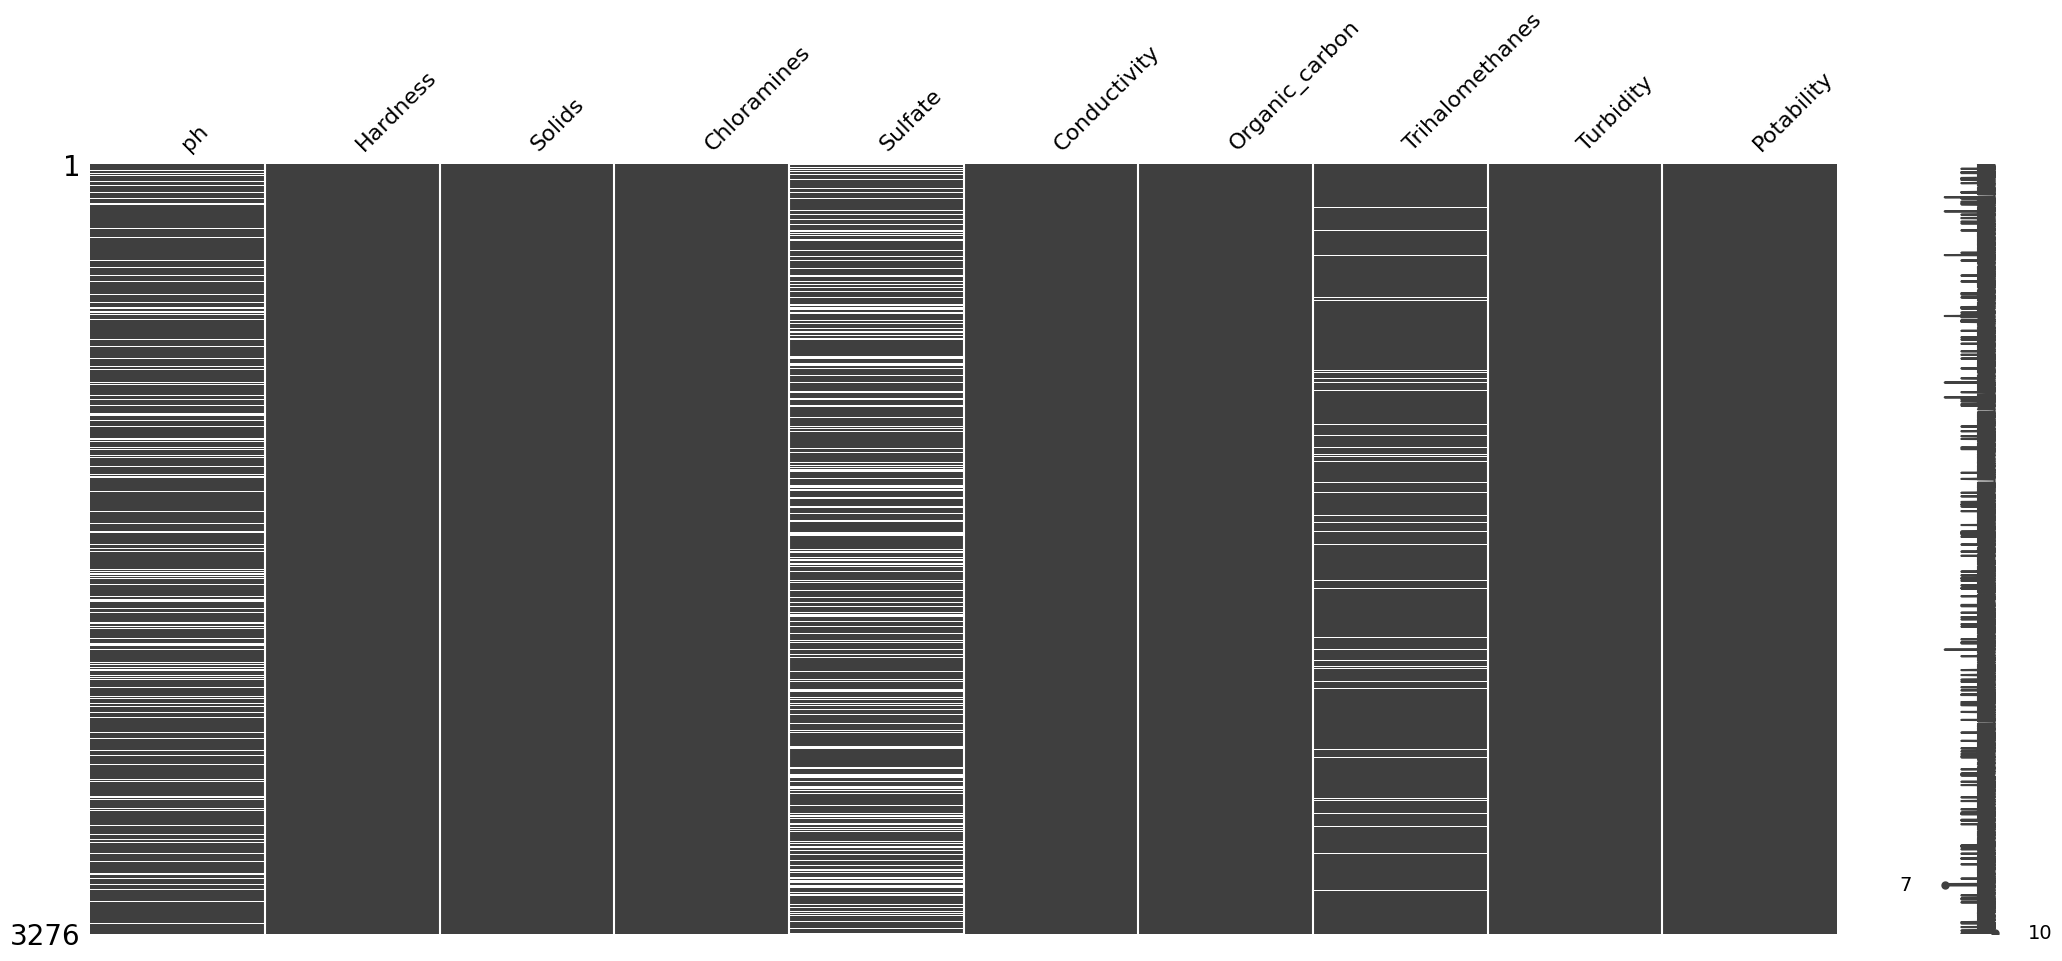

In [6]:
#Plot missing values
!pip install missingno
import missingno as mno
mno.matrix(df)


# Analyze ph column

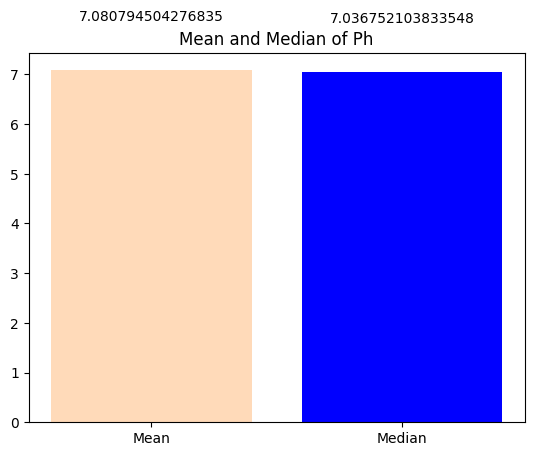

In [7]:

# Calculate mean and median of the column
col_mean = df['ph'].mean()
col_median = df['ph'].median()
a=df['ph'].mean()
b=df['ph'].median()
x=['Mean','Median']
y=[a,b]

for i in range(len(x)):
    plt.text(i, y[i]+1, y[i], ha='center')

# Create bar chart
plt.bar(['Mean', 'Median'], [col_mean, col_median],color=['peachpuff', 'blue'])
plt.title('Mean and Median of Ph')
plt.show()



# Analyze Sulfate column

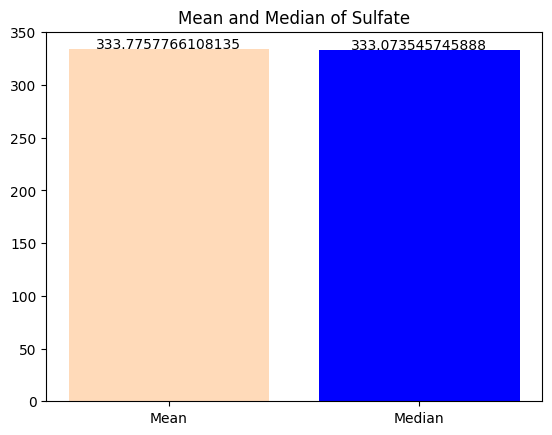

In [8]:

col_mean = df['Sulfate'].mean()
col_median = df['Sulfate'].median()
a_1=df['Sulfate'].mean()
b_1=df['Sulfate'].median()
y_1=[a_1,b_1]
x_1=['Mean','Median']

# Create bar chart
plt.bar(['Mean', 'Median'], [col_mean, col_median],color=['peachpuff', 'blue'])
for i in range(len(x_1)):
    plt.text(i, y_1[i]+1, y_1[i], ha='center')
plt.title('Mean and Median of Sulfate')
plt.show()




# Analyze Trihalomethanes column

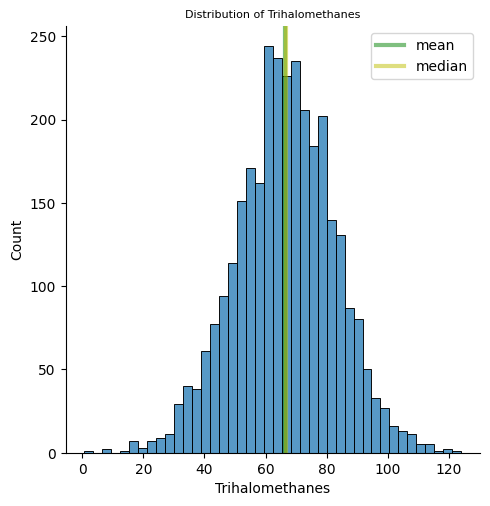

In [9]:
#Trihalomethanes
sn.displot(df["Trihalomethanes"], kde=False)
plt.axvline(x=df.Trihalomethanes.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.Trihalomethanes.median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.xlabel("Trihalomethanes")
plt.ylabel("Count")
plt.title("Distribution of Trihalomethanes", size=8)
plt.legend(["mean", "median"])
plt.show()

# Imputation missing value

In [10]:

#Missing value
df["ph"] = df["ph"].fillna(df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Outlier in data

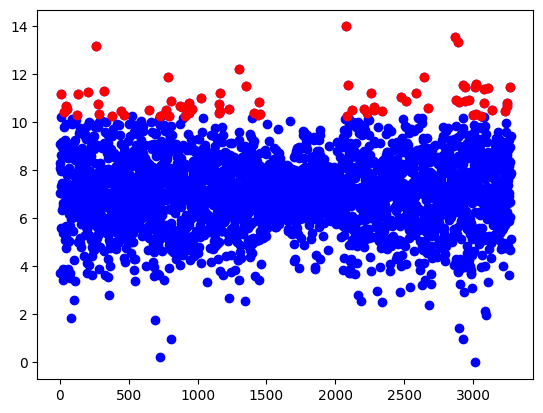

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x=range(len(df)), y=df['ph'], c='blue')

outliers = df['ph'] > df['ph'].quantile(0.75) + 1.5*(df['ph'].quantile(0.75) - df['ph'].quantile(0.25))
plt.scatter(x=outliers[outliers].index, y=df.loc[outliers, 'ph'], c='red')


# Correlation between variables

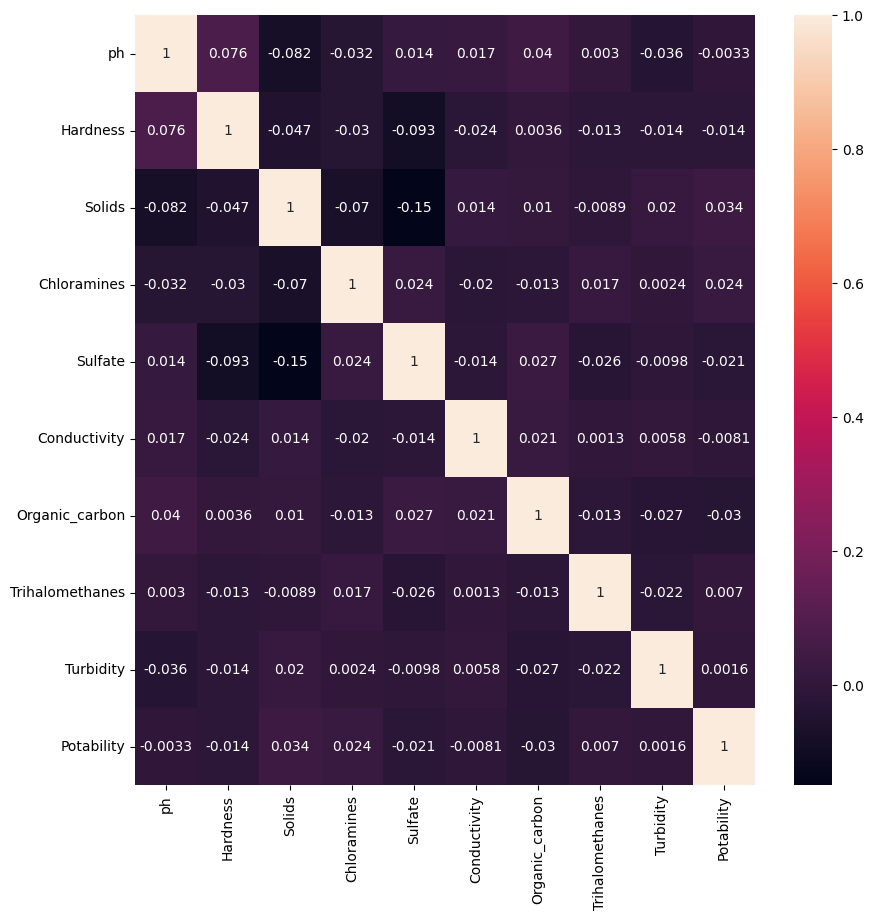

In [12]:
corr=df.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corr,annot=True)
plt.show()

In [13]:
skewness = df.skew()
skewed_columns = skewness[abs(skewness) > 1]
print("Number of Skewed Columns:",skewed_columns.shape[0])

Number of Skewed Columns: 0


In [14]:
# Distribution of Potability
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

# Feature Transformation

In [16]:
# Transform data using StandardScaler
!pip install scikit-learn
from sklearn.preprocessing import  StandardScaler
numeric_columns = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(numeric_columns)
scaled_df = pd.DataFrame(scaled_columns, columns=numeric_columns.columns)
scaled_df.head()


                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.1/8.3 MB 1.3 MB/s eta 0:00:07
                                              0.2/8.3 MB 1.8 MB/s eta 0:00:05
     -                                        0.3/8.3 MB 1.8 MB/s eta 0:00:05
     --                                       0.4/8.3 MB 2.0 MB/s eta 0:00:04
     --                                       0.5/8.3 MB 2.0 MB/s eta 0:00:04
     ---                                      0.6/8.3 MB 2.1 MB/s eta 0:00:04
     ---                                      0.7/8.3 MB 2.1 MB/s eta 0:00:04
     ---                                      0.8/8.3 MB 2.0 MB/s eta 0:00:04
     ----                                     0.8/8.3 MB 1.8 MB/s eta 0:00:05
     ----                                     1.0/8.3 MB 1.9 MB/s eta 0:00:04
     -----                                    1.0/8.3 MB 1.9 MB/s eta 0:00:04


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,-0.799775
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,-0.799775
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,-0.799775
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,-0.799775
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,-0.799775


In [ ]:
# Save data in csv file
df.to_csv('D:\AIL303m\water_potability_scaled.csv')

# Hypothesis Testing

In [ ]:

data_subset = df[['ph', 'Solids']]
correlation = data_subset['ph'].corr(data_subset['Solids'])
print("Correlation Coefficient: ", correlation)
stats.ttest_ind(data_subset['ph'], data_subset['Solids'])


# Next Step in analyzing the data

We can build a model and predict the potential of water based on the data.

# Quality of data
The data is almost complete because it still have missing value and null values in the data. But after clean, the dataset also seems to be fairly accurate, with most of the measurements taken using standard and well-established methods.

# Key Finding
1. There are some concerns regarding the consistency of the data, as some of the recorded values fall outside of the expected range for certain features
2. While the dataset provides information on various water quality parameters, there may be other factors that could influence water potability that are not included in the dataset.